<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Load the csv file and print the first five observations.

In [58]:
df_earth = pd.read_csv('Earthquake_Data.csv')
df_earth.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
df_earth.shape

(1647, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
df_earth.dtypes

Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
df_earth.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
print(df_earth.describe())

          Latitude    Longitude   DepthMeters    Magnitude
count  1647.000000  1647.000000   1647.000000  1647.000000
mean     39.903436   -79.008111   7559.720704     2.384827
std       2.410973     3.192442   5205.963953     0.459781
min      37.007700   -82.881000    100.000000     0.200000
25%      37.902400   -81.694150   3450.000000     2.100000
50%      38.477800   -80.831400   6400.000000     2.400000
75%      41.467200   -75.934050  11500.000000     2.600000
max      45.300900   -73.063400  32300.000000     5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

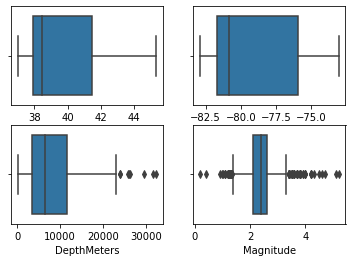

In [63]:
plt.subplot(2,2,1)
sns.boxplot(df_earth['Latitude']);
plt.subplot(2,2,2)
sns.boxplot(df_earth['Longitude']);
plt.subplot(2,2,3)
sns.boxplot(df_earth['DepthMeters']);
plt.subplot(2,2,4)
sns.boxplot(df_earth['Magnitude']);

In [64]:
df_earth.skew()

Latitude       0.746850
Longitude      0.550076
DepthMeters    0.671018
Magnitude      0.630080
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
q1 = df_earth.quantile(0.25)
q3 = df_earth.quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
df_earth = df_earth[~((df_earth  < ll) | (df_earth > ul)).any(axis=1)]
df_earth.shape

(1562, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
df_earth_new = df_earth.drop(['Latitude','Longitude'],axis=1)
df_earth_new.head()

,DepthMeters,Magnitude
0,5000,2.8
1,11500,2.8
2,18000,2.1
3,5000,2.4
5,2300,2.4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
sc = StandardScaler()
df_earth_new_scaled = pd.DataFrame(sc.fit_transform(df_earth_new),columns=df_earth_new.columns)
df_earth_new_scaled.head()

,DepthMeters,Magnitude
0,-0.488908,1.252394
1,0.803530,1.252394
2,2.095968,-0.735020
3,-0.488908,0.116729
4,-1.025767,0.116729


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
num=range(1,8)
WCSS=[]
for i in num:
    cluster = KMeans(n_clusters=i)
    cluster.fit(df_earth_new_scaled)
    WCSS.append(cluster.inertia_)
wcss = pd.DataFrame({'Number':num,'Error':WCSS})
wcss

,Number,Error
0,1,3124.000000
1,2,1943.582212
2,3,1257.977080
3,4,964.274883
4,5,790.528300
5,6,672.962545
6,7,589.429643


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

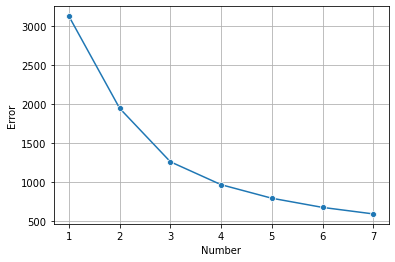

In [79]:
sns.lineplot(y = 'Error',x='Number',data=wcss,marker='o');
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
c=range(2,8)
scores = []
for i in c:
    cluster = KMeans(n_clusters=i)
    labels = cluster.fit_predict(df_earth_new_scaled)
    score = silhouette_score(df_earth_new_scaled,labels,random_state=1)
    scores.append(score)
    print('the score for', i, 'is', score)

the score for 2 is 0.3743704735416158
the score for 3 is 0.39268003903375004
the score for 4 is 0.3675083071920705
the score for 5 is 0.34403998199105773
the score for 6 is 0.34875089053007097
the score for 7 is 0.3467326108019026


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

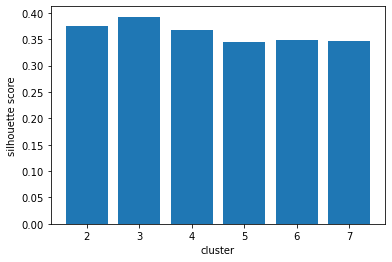

In [97]:
plt.bar(c,scores);
plt.xlabel('cluster');
plt.ylabel('silhouette score');

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [99]:
#!pip install yellowbrick

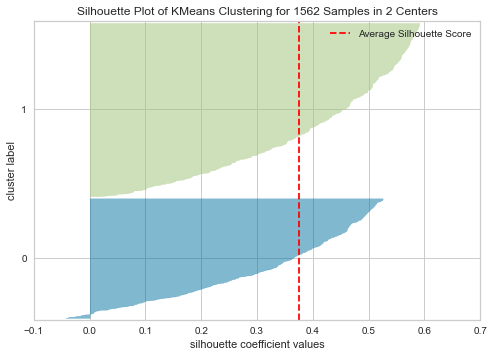

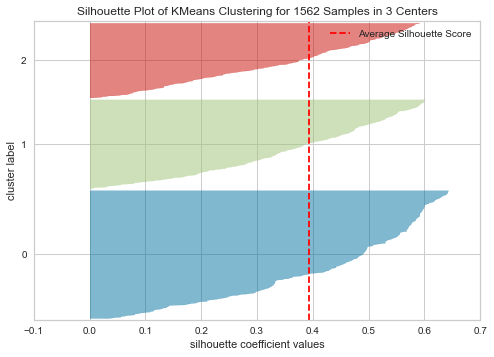

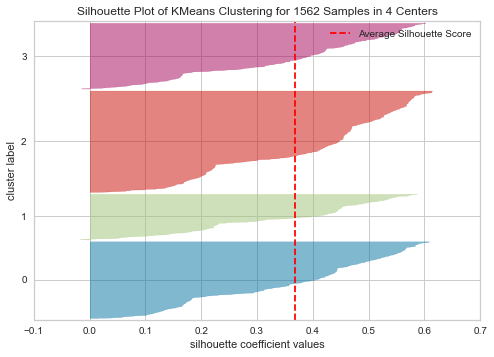

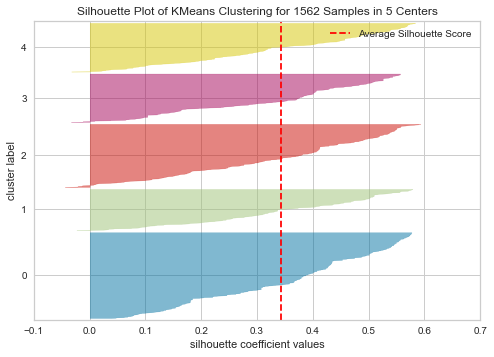

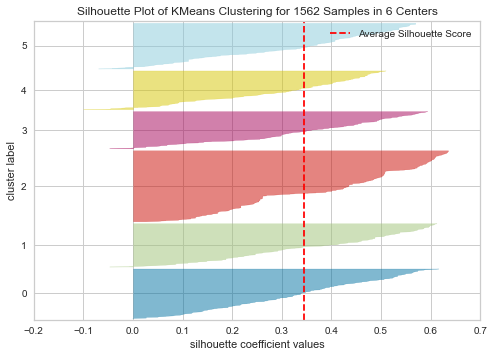

In [100]:
from yellowbrick.cluster import SilhouetteVisualizer
num = range(2,7)
for i in num:
    cluster = KMeans(n_clusters=i)
    visualizer = SilhouetteVisualizer(cluster,colors = 'yellowbrick')
    visualizer.fit(df_earth_new_scaled)
    visualizer.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [138]:
Kmeans = KMeans(n_clusters=3)
Kmeans_new = Kmeans.fit_predict(df_earth_new_scaled)
df_earth_new1 = df_earth_new.copy()
df_earth_new1['Labels'] = labels_new
df_earth_new1.head()

,DepthMeters,Magnitude,Labels
0,5000,2.8,2
1,11500,2.8,1
2,18000,2.1,1
3,5000,2.4,2
5,2300,2.4,2


<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
df_earth_new1['Labels'].value_counts()

2    685
1    477
0    400
Name: Labels, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

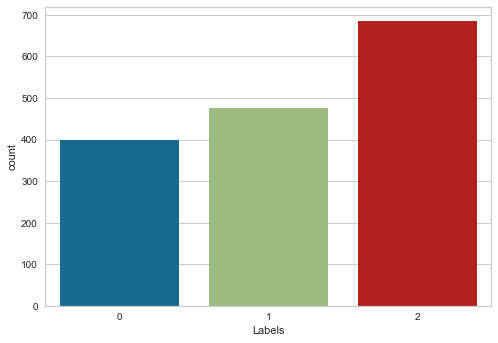

In [140]:
sns.countplot(df_earth_new1['Labels']);

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [141]:
Kmeans.cluster_centers_

array([[ 1.17474623,  0.16696511],
       [-0.71964524,  0.59192623],
       [-0.16849241, -1.21277955]])

In [142]:
Kmeans.inertia_

1257.9770800049282

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [143]:
d1=df_earth_new1[df_earth_new1.Labels==0]
d1.describe()

,DepthMeters,Magnitude,Labels
count,400.000000,400.000000,400.0
mean,6611.450000,1.931725,0.0
std,3683.651261,0.211741,0.0
min,100.000000,1.390000,0.0
25%,4200.000000,1.800000,0.0
50%,6000.000000,2.000000,0.0
75%,8772.500000,2.100000,0.0
max,18600.000000,2.230000,0.0


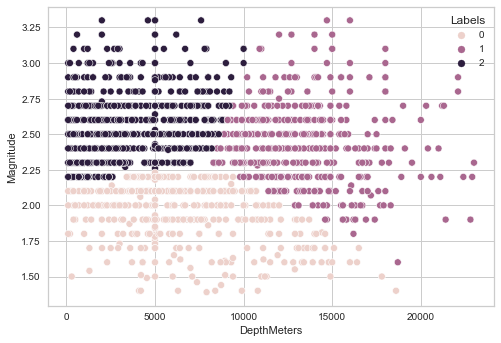

In [149]:
sns.scatterplot(x='DepthMeters',y='Magnitude',data=df_earth_new1,hue='Labels');

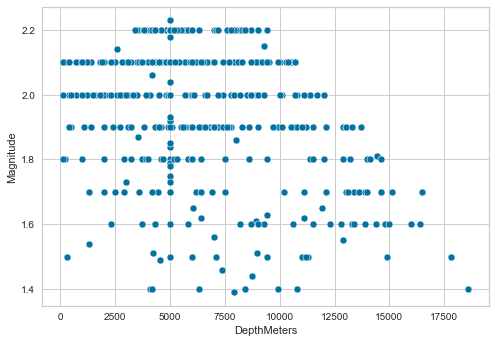

In [146]:
sns.scatterplot(x='DepthMeters',y='Magnitude',data=d1);

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [144]:
d2=df_earth_new1[df_earth_new1.Labels==1]
d2.describe()

,DepthMeters,Magnitude,Labels
count,477.000000,477.000000,477.0
mean,13366.939203,2.417694,1.0
std,2846.765942,0.272955,0.0
min,8300.000000,1.600000,1.0
25%,11300.000000,2.200000,1.0
50%,13100.000000,2.400000,1.0
75%,14900.000000,2.600000,1.0
max,23000.000000,3.300000,1.0


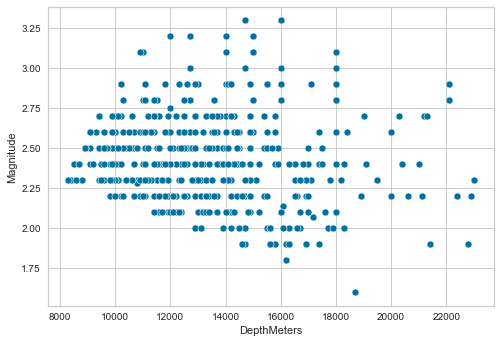

In [147]:
sns.scatterplot(x='DepthMeters',y='Magnitude',data=d2);

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
d3=df_earth_new1[df_earth_new1.Labels==2]
d3.describe()

,DepthMeters,Magnitude,Labels
count,685.000000,685.000000,685.0
mean,3839.562044,2.567372,2.0
std,2515.001619,0.229455,0.0
min,100.000000,2.200000,2.0
25%,1500.000000,2.400000,2.0
50%,3700.000000,2.500000,2.0
75%,5600.000000,2.700000,2.0
max,10000.000000,3.300000,2.0


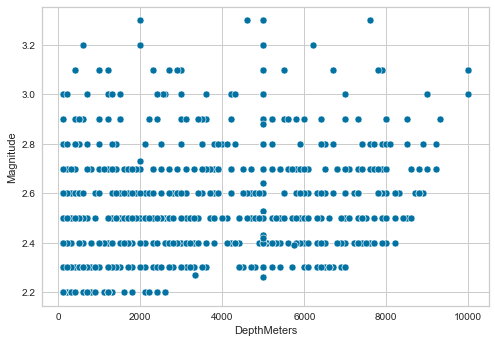

In [148]:
sns.scatterplot(x='DepthMeters',y='Magnitude',data=d3);